In [68]:
import math
from matplotlib import pyplot as plt
import matplotlib.patches as mpatches

import numpy as np


def xrange(start, stop, step):
    while start < stop:
        yield start
        start += step
        
def get_X_y(function, start, stop, step=0.1):
    X = list(xrange(start, stop, step))
    y = [function(x) for x in X]
    return (X, y)


def draw_plt(*graphs_args):
    patches = []
    for X, y, color, name in graphs_args:
        plt.scatter(X, y, color=color)
        patches.append(mpatches.Patch(color=color, label=name))
    plt.legend(handles=patches)
    plt.xticks(rotation=80)

    plt.show()

'gini': Неопределенность Джини  F(X)=1−∑Ki=1p2iF(X)=1−∑i=1Kpi2 .

In [24]:
def gini(y):
    return 1 - np.sum(y ** 2)
#     return 1 - np.sum(np.square(y))

X = np.array(list(xrange(-10, 10, 1)))
y = gini(X)
y
# draw_plt(X, y)
# np.square(X)

-669

In [4]:
# Дерево решений
def entropy(y):    
    p = [len(y[y == k]) / len(y) for k in np.unique(y)]
    return -np.dot(p, np.log2(p))

def gini(y):
    p = [len(y[y == k]) / len(y) for k in np.unique(y)]
    return 1 - np.dot(p, p)

# дисперсионный критерий и медианный критерий - для регрессии
def variance(y):
    return np.var(y)

def mad_median(y):
    return np.mean(np.abs(y - np.median(y)))

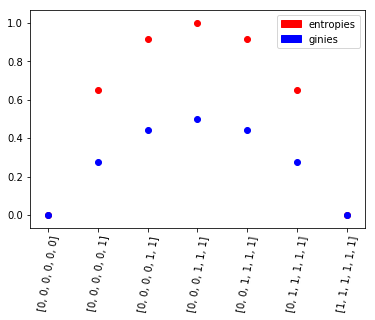

In [47]:
logistic_y = [
    [1, 1, 1, 1, 1, 1],
    [0, 1, 1, 1, 1, 1],
    [0, 0, 1, 1, 1, 1],
    [0, 0, 0, 1, 1, 1],
    [0, 0, 0, 0, 1, 1],
    [0, 0, 0, 0, 0, 1],
    [0, 0, 0, 0, 0, 0],
]

entropies = [entropy(np.array(y)) for y in logistic_y]
ginies = [gini(np.array(y)) for y in logistic_y]
logistic_y_str = [str(y) for y in logistic_y]

draw_plt([logistic_y_str, entropies, 'red', 'entropies'], [logistic_y_str, ginies, 'blue', 'ginies'],)

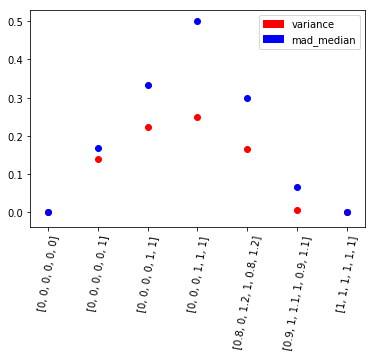

In [48]:
regression_y = [
    [1, 1, 1, 1, 1, 1],
    [0.9, 1, 1.1, 1, 0.9, 1.1],
    [0.8, 0, 1.2, 1, 0.8, 1.2],
    [0, 0, 0, 1, 1, 1],
    [0, 0, 0, 0, 1, 1],
    [0, 0, 0, 0, 0, 1],
    [0, 0, 0, 0, 0, 0],
]

entropies = [variance(np.array(y)) for y in regression_y]
ginies = [mad_median(np.array(y)) for y in regression_y]
regression_y_str = [str(y) for y in regression_y]

draw_plt([regression_y_str, entropies, 'red', 'variance'], [regression_y_str, ginies, 'blue', 'mad_median'],)

'entropy': Энтропия  F(X)=−∑Ki=1pilog2(pi)F(X)=−∑i=1Kpilog2⁡(pi) .

'variance': Дисперсия (среднее квадратичное отклонение от среднего) $F(X) = \dfrac{1}{|X|} \sum_{x_j \in X}(y_j - \dfrac{1}{|X|}\sum_{x_i \in X}y_i)^2$

### Logistic regression

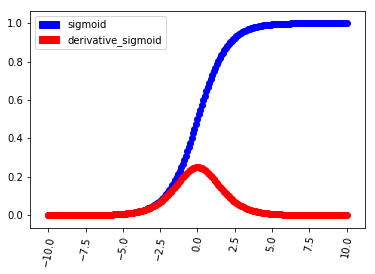

In [49]:
# Logistic regression


def sigmoid(x):
    '''
    RO(x) = P(x) / (1 - P(x))
    log(RO) = W*X
    
    p+ = OR / (1 + OR) = exp^(W*X) / (1 + exp^(W*X)) = 1 / (1 + exp^(-1*W*X)) = sigmoid(W*X)
    p- = 1 - sigmoid(W*X))
    '''
    return 1 / (1 + math.exp(-x))

def derivative_sigmoid(x):
    return sigmoid(x) * (1 - sigmoid(x))

draw_plt(
    [*get_X_y(sigmoid, -10, 10), 'blue', 'sigmoid'], 
    [*get_X_y(derivative_sigmoid, -10, 10), 'red', 'derivative_sigmoid'],
)

In [69]:
# то что х
def logloss_crutch(y_true, y_pred, eps=1e-15):
    return - (y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

print('Logloss при неуверенной классификации %f' % logloss_crutch(1, 0.5))
print('Logloss при уверенной классификации и верном ответе %f' % logloss_crutch(1, 0.9))
print('Logloss при уверенной классификации и НЕверном ответе %f' % logloss_crutch(1, 0.1))


Logloss при неуверенной классификации 0.693147
Logloss при уверенной классификации и верном ответе 0.105361
Logloss при уверенной классификации и НЕверном ответе 2.302585


### Errors

In [5]:
''' 
1-столбец - что мы предсказали y_pred; 2-ой что должны были предсказать y
tp 1 1     fp 0 1
fn 1 0     tn 0 0
''';

In [6]:
# доля объектов, названных классификатором положительными и при этом действительно являющимися положительными
# tp / (tp + fp)
precision = lambda tp, fp, fn, tn: tp / (tp + fp)  # точность 

In [7]:
# tp / (tp + fn)
# доля объектов положительного класса из всех объектов положительного класса нашел алгоритм
recall = lambda tp, fp, fn, tn: tp / (tp + fn)  # полнота

AUC-ROC  (Area Under Curve)  (Receiver Operating Characteristic curve)

мы должны выбрать какой-либо порог, при котором 0 становится 1. Естественным и близким кажется порог, равный 0.5, но он не всегда оказывается оптимальным, например, при вышеупомянутом отсутствии баланса классов.

In [ ]:
tpr = lambda tp, fp, fn, tn: recall(tp, fp, fn, tn)  # tp / (tp + fn)
# fpr - какую долю из объектов negative класса алгоритм предсказал неверно
fpr = lambda tp, fp, fn, tn: tp / (tp + fn)  # 

когда классификатор случайно выдает вероятности классов, AUC-ROC будет стремиться к 0.5, так как классификатор будет выдавать одинаковое количество TP и FP.
Каждая точка на графике соответствует выбору некоторого порога. Площадь под кривой в данном случае показывает качество алгоритма (больше — лучше), кроме этого, важной является крутизна самой кривой — мы хотим максимизировать TPR, минимизируя FPR, 
а значит, наша кривая в идеале должна стремиться к точке (0,1).

In [70]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pylab import rc, plot
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import precision_recall_curve, classification_report
from sklearn.model_selection import train_test_split

df = pd.read_csv('data/telecom_churn.csv')

In [27]:
d = {'Yes' : 1, 'No' : 0}

df['International plan'] = df['International plan'].map(d)
df['Voice mail plan'] = df['Voice mail plan'].map(d)
df['Churn'] = df['Churn'].astype('int64')

le = LabelEncoder()
df['State'] = le.fit_transform(df['State'])

ohe = OneHotEncoder(sparse=False)

encoded_state = ohe.fit_transform(df['State'].values.reshape(-1, 1))
tmp = pd.DataFrame(encoded_state,  
                   columns=['state ' + str(i) for i in range(encoded_state.shape[1])])
df = pd.concat([df, tmp], axis=1)
X = df.drop('Churn', axis=1)
y = df['Churn']

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,  test_size=0.33, random_state=42)

# Обучаем ставшую родной логистическую регрессию

lr = LogisticRegression(random_state=42)
lr.fit(X_train, y_train)
y_predicted = lr.predict(X_test)

report = classification_report(y_test, y_predicted)
print(report)

             precision    recall  f1-score   support

          0       0.88      0.97      0.92       941
          1       0.57      0.25      0.35       159

avg / total       0.84      0.86      0.84      1100



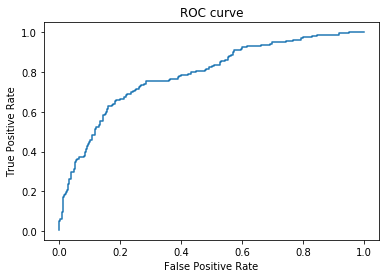

('treshholds',
 array([0.99203193, 0.82741894, 0.80695408]),
 array([0.01042919, 0.01015913, 0.00190964]))

In [64]:
from sklearn.metrics import roc_curve

# проходит по диапозону 0, 0.1, 0.2 ... 0.9 и для каждого из этих treshhold вычисляет y_predict и для них берет fpr, tpr
fpr, tpr, thresholds = roc_curve(y_test, lr.predict_proba(X_test)[:,1], pos_label=1)
plt.plot(fpr, tpr, label='ROC curve ')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.show()
'treshholds', thresholds[:3], thresholds[-3:]

In [60]:
print(lr.predict(X_test)[:3])
lr.predict_proba(X_test)[:3]

[0 1 1]


array([[0.98197463, 0.01802537],
       [0.32408158, 0.67591842],
       [0.34090353, 0.65909647]])

### Work with texts

In [1]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, Bag

texts = [
    'Hello word!',
    'Mister Hello hi'
]
counted = CountVectorizer().fit_transform(texts)
print(counted.toarray())
tfidf = TfidfTransformer().fit_transform(counted)
print(tfidf.toarray());

[[1 0 0 1]
 [1 1 1 0]]
[[0.57973867 0.         0.         0.81480247]
 [0.44943642 0.6316672  0.6316672  0.        ]]


/Users/nvkorolkov/.virtualenvs/ml3.6/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1089: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
